In this notebook we are going to analyse chess data using Python. The dataset used for this [EDA]('https://www.epa.gov/caddis/exploratory-data-analysis') (Exploratory Data Analysis) is a set of all my chess games on [Chess.com]('https://www.chess.com').
Inspired by kaggle [notebook]('https://www.kaggle.com/code/anaqiamir/chess-data-analysis').

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re

In [ ]:
# games is a Pandas DataFrame
games = pd.read_json("chess_data.json")

def clean_opening(opening):
    cleaned = re.sub(r"(\d+\.*\.*[a-h]?[1-8]?[+#=]?[a-h]?[1-8]?).*", "", opening).strip()
    return re.sub(r"[-\s]+$", "", cleaned)

# Zastosowanie do kolumny 'opening'
games["opening"] = games["opening"].apply(clean_opening)


Check if data was loaded properly

In [ ]:
games.head()

,rated,turns,victory_status,winner,time_class,white_id,white_rating,black_id,black_rating,opening
0,True,53,Time forfeit,White,blitz,Pablo_810,1162,ahmed8909,838,Pirc-Defense
1,True,67,Resign,White,blitz,MichaelMikeCorleone,1099,Pablo_810,987,Van-t-Kruijs-Opening
2,True,30,Resign,Black,blitz,POLCIE,997,Pablo_810,1095,Kings-Fianchetto-Opening
3,True,44,Resign,Black,blitz,Pablo_810,1033,contakto,1181,Bishops-Opening
4,True,69,Time forfeit,White,blitz,Fernando2017p,1088,Pablo_810,976,Queens-Pawn-Opening


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8944 entries, 0 to 8943
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rated           8944 non-null   bool  
 1   turns           8944 non-null   int64 
 2   victory_status  8944 non-null   object
 3   winner          8944 non-null   object
 4   time_class      8944 non-null   object
 5   white_id        8944 non-null   object
 6   white_rating    8944 non-null   int64 
 7   black_id        8944 non-null   object
 8   black_rating    8944 non-null   int64 
 9   opening         8944 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 637.7+ KB


<Axes: xlabel='rated', ylabel='count'>

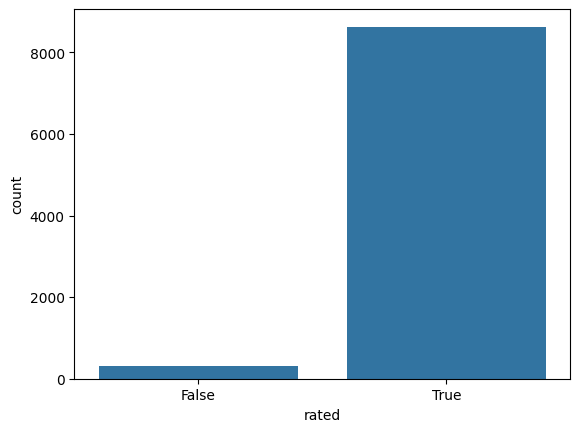

In [ ]:
sns.countplot(x = games['rated'])

<Axes: xlabel='white_rating', ylabel='Count'>

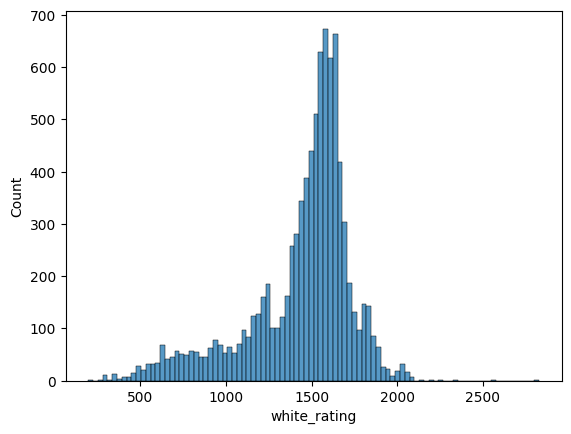

In [ ]:
sns.histplot(x = games['white_rating'])

<Axes: xlabel='black_rating', ylabel='Count'>

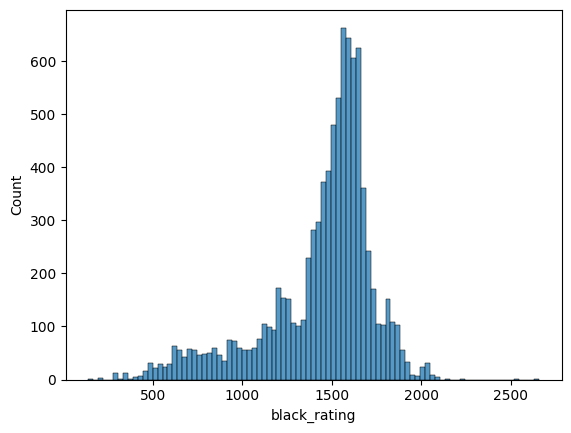

In [ ]:
sns.histplot(x = games['black_rating'])

In [ ]:
games['opening'].value_counts().head(10)

,count
opening,
Sicilian-Defense,518
English-Opening-Anglo-Scandinavian-Defense,274
English-Opening-Reversed-Sicilian-Variation,237
Sicilian-Defense-Bowdler-Attack,207
English-Opening-Two-Knights-Variation,139
English-Opening-Agincourt-Defense,138
Sicilian-Defense-Open-Najdorf-Variation,133
Sicilian-Defense-Delayed-Alapin-Variation,122
Philidor-Defense,113


<Axes: xlabel='winner', ylabel='count'>

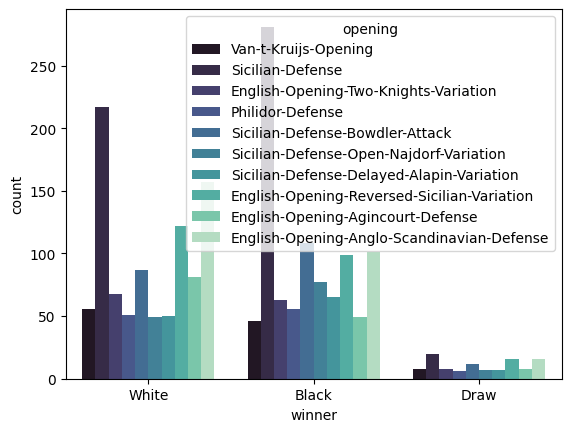

In [ ]:
top_10_openings = games[(games['opening'] == 'Sicilian-Defense') |
                     (games['opening'] == 'English-Opening-Anglo-Scandinavian-Defense') |
                     (games['opening'] == 'English-Opening-Reversed-Sicilian-Variation') |
                     (games['opening'] == 'Sicilian-Defense-Bowdler-Attack') |
                     (games['opening'] == 'English-Opening-Two-Knights-Variation') |
                     (games['opening'] == 'English-Opening-Agincourt-Defense') |
                     (games['opening'] == 'Sicilian-Defense-Open-Najdorf-Variation') |
                     (games['opening'] == 'Sicilian-Defense-Delayed-Alapin-Variation') |
                     (games['opening'] == 'Philidor-Defense') |
                     (games['opening'] == 'Van-t-Kruijs-Opening')]
sns.countplot(data = top_10_openings,
              x = 'winner',
              hue = 'opening',
              palette = 'mako')

In [ ]:
# how many games started with Sicilian Defense and has White as a winner
top_10_openings[(top_10_openings['opening'] == 'Sicilian-Defense') &
                (top_10_openings['winner'] == 'White')]['rated'].count()

217

In [ ]:
# how many games started with Sicilian Defense and has White as a winner
top_10_openings[(top_10_openings['opening'] == 'Sicilian-Defense') &
                (top_10_openings['winner'] == 'Black')]['rated'].count()

281

In [ ]:
def getResultsByOpening(df, opening):
  total = df[df['opening']==opening]['rated'].count()
  white = df[(df['opening']==opening) & (df['winner']=='White')]['rated'].count()
  black = df[(df['opening']==opening) & (df['winner']=='Black')]['rated'].count()
  draw = df[(df['opening']==opening) & (df['winner']=='Draw')]['rated'].count()
  return total, white, black, draw

In [ ]:
results_by_opening = pd.DataFrame(columns=['White(%)', 'Black(%)', 'Draw(%)'])

unique_openings = games['opening'].unique()
for opening in unique_openings:
  total, white, black, draw = getResultsByOpening(games, opening)
  results_by_opening.loc[opening] = [round((white/total)*100,2),
                                      round((black/total)*100,2),
                                      round((draw/total)*100,2)]


In [ ]:
results_by_opening.head(10)

,White(%),Black(%),Draw(%)
Pirc-Defense,45.00,55.00,0.00
Van-t-Kruijs-Opening,50.91,41.82,7.27
Kings-Fianchetto-Opening,50.82,45.90,3.28
Bishops-Opening,33.33,66.67,0.00
Queens-Pawn-Opening,40.66,56.04,3.30
Portuguese-Opening,0.00,0.00,100.00
French-Defense-Kings-Indian-Attack,50.00,50.00,0.00
Ruy-Lopez-Opening-Berlin-Defense,100.00,0.00,0.00
Kings-Pawn-Opening-Leonardis-Variation,58.82,41.18,0.00
Queens-Pawn-Opening-Keres-Defense,0.00,100.00,0.00


In [ ]:
games[['rated', 'turns',  'white_rating', 'black_rating']].corr()

,rated,turns,white_rating,black_rating
rated,1.000000,0.076087,0.136668,0.156550
turns,0.076087,1.000000,0.161565,0.163743
white_rating,0.136668,0.161565,1.000000,0.836386
black_rating,0.156550,0.163743,0.836386,1.000000


<Axes: >

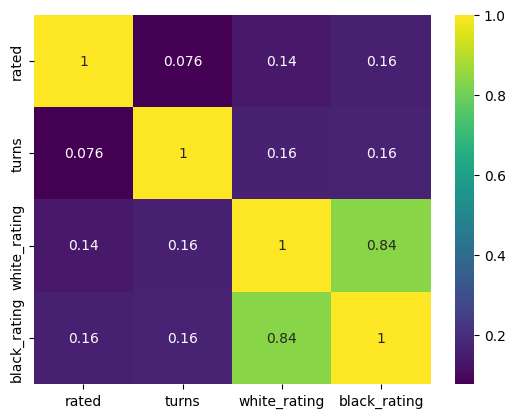

In [ ]:
sns.heatmap(data = games[['rated', 'turns',  'white_rating', 'black_rating']].corr(),
            annot = True,
            cmap= 'viridis')